# Rogistic Regression (2)

- Training Data 특성과 분포를 나타내는 최적의 직선을 찾고 (Linear Regression)
- 그 직선을 기준으로 데이터를 위(1) 또는 아래(0) 등으로 분류(Classification) 해주는 알고리즘

=> 이러한 Logistic Regression은 Classification 알고리즘 중에서도 정확도가 높은 알고리즘으로 알려져 있어서 Deep Learning에서 기본 Component로 사용되고 있음.

## 1. 필요 모듈 불러오기

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

tf.__version__

'2.7.0'

## 2. 파일 불러오기

In [2]:
try:
    
    loaded_data = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)

    # training data / test data 분리
    seperation_rate = 0.3 # 분리 비울
    test_data_num = int(len(loaded_data) * seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[ 0:test_data_num ]
    training_data = loaded_data[ test_data_num: ]

    # training_x_data / training_t__data 생성  슬라이싱 활용
    training_x_data = training_data[ :, 0:-1]
    training_t_data = training_data[ :, [-1]]

    # test_x_data / test_t__data 생성
    test_x_data = test_data[ :, 0:-1]
    test_t_data = test_data[ :, [-1]]

    print("loaded_data.shape = ", loaded_data.shape)
    print("training_x_data.shape = ", training_x_data.shape)
    print("training_t_data.shape = ", training_t_data.shape)

    print("test_x_data.shape = ", test_x_data.shape)
    print("test_t_data.shape = ", test_t_data.shape)
    
except Exception as err:

    print(str(err))

loaded_data.shape =  (759, 9)
training_x_data.shape =  (532, 8)
training_t_data.shape =  (532, 1)
test_x_data.shape =  (227, 8)
test_t_data.shape =  (227, 1)


## 3. 모델 구축

In [3]:
# Logistic Regression 을 keras 이용하여 생성
model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1], 
                # training_t_data.shape =  (18, 1) 두번째 컬럼인 1
                input_shape=(training_x_data.shape[1],),
                # training_t_data.shape =  (18, 3) 두번째 컬럼인 3
                activation='sigmoid'))  

## 4. 모델 컴파일

In [4]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [5]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(training_x_data, training_t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
14/14 - 1s - loss: 0.5831 - accuracy: 0.6588 - val_loss: 0.5568 - val_accuracy: 0.6822 - 576ms/epoch - 41ms/step
Epoch 2/500
14/14 - 0s - loss: 0.5813 - accuracy: 0.6565 - val_loss: 0.5555 - val_accuracy: 0.6729 - 32ms/epoch - 2ms/step
Epoch 3/500
14/14 - 0s - loss: 0.5794 - accuracy: 0.6635 - val_loss: 0.5545 - val_accuracy: 0.6729 - 40ms/epoch - 3ms/step
Epoch 4/500
14/14 - 0s - loss: 0.5782 - accuracy: 0.6659 - val_loss: 0.5534 - val_accuracy: 0.6729 - 40ms/epoch - 3ms/step
Epoch 5/500
14/14 - 0s - loss: 0.5768 - accuracy: 0.6659 - val_loss: 0.5524 - val_accuracy: 0.6822 - 40ms/epoch - 3ms/step
Epoch 6/500
14/14 - 0s - loss: 0.5753 - accuracy: 0.6635 - val_loss: 0.5514 - val_accuracy: 0.6822 - 40ms/epoch - 3ms/step
Epoch 7/500
14/14 - 0s - loss: 0.5741 - accuracy: 0.6635 - val_loss: 0.5506 - val_accuracy: 0.6729 - 40ms/epoch - 3ms/step
Epoch 8/500
14/14 - 0s - loss: 0.5730 - accuracy: 0.6659 - val_loss: 0.5498 - val_accuracy: 0.6729 - 128ms/epoch - 9ms/step
Epoch 9/500
1

Epoch 68/500
14/14 - 0s - loss: 0.5418 - accuracy: 0.7224 - val_loss: 0.5246 - val_accuracy: 0.6916 - 40ms/epoch - 3ms/step
Epoch 69/500
14/14 - 0s - loss: 0.5414 - accuracy: 0.7247 - val_loss: 0.5244 - val_accuracy: 0.6916 - 32ms/epoch - 2ms/step
Epoch 70/500
14/14 - 0s - loss: 0.5411 - accuracy: 0.7247 - val_loss: 0.5240 - val_accuracy: 0.6916 - 40ms/epoch - 3ms/step
Epoch 71/500
14/14 - 0s - loss: 0.5407 - accuracy: 0.7247 - val_loss: 0.5237 - val_accuracy: 0.7009 - 32ms/epoch - 2ms/step
Epoch 72/500
14/14 - 0s - loss: 0.5403 - accuracy: 0.7247 - val_loss: 0.5233 - val_accuracy: 0.7009 - 40ms/epoch - 3ms/step
Epoch 73/500
14/14 - 0s - loss: 0.5400 - accuracy: 0.7271 - val_loss: 0.5231 - val_accuracy: 0.7009 - 32ms/epoch - 2ms/step
Epoch 74/500
14/14 - 0s - loss: 0.5397 - accuracy: 0.7271 - val_loss: 0.5228 - val_accuracy: 0.7103 - 32ms/epoch - 2ms/step
Epoch 75/500
14/14 - 0s - loss: 0.5393 - accuracy: 0.7271 - val_loss: 0.5225 - val_accuracy: 0.7196 - 40ms/epoch - 3ms/step
Epoch 76

Epoch 134/500
14/14 - 0s - loss: 0.5224 - accuracy: 0.7388 - val_loss: 0.5064 - val_accuracy: 0.7664 - 40ms/epoch - 3ms/step
Epoch 135/500
14/14 - 0s - loss: 0.5222 - accuracy: 0.7388 - val_loss: 0.5062 - val_accuracy: 0.7664 - 32ms/epoch - 2ms/step
Epoch 136/500
14/14 - 0s - loss: 0.5219 - accuracy: 0.7388 - val_loss: 0.5059 - val_accuracy: 0.7664 - 40ms/epoch - 3ms/step
Epoch 137/500
14/14 - 0s - loss: 0.5217 - accuracy: 0.7388 - val_loss: 0.5057 - val_accuracy: 0.7664 - 40ms/epoch - 3ms/step
Epoch 138/500
14/14 - 0s - loss: 0.5215 - accuracy: 0.7412 - val_loss: 0.5056 - val_accuracy: 0.7664 - 32ms/epoch - 2ms/step
Epoch 139/500
14/14 - 0s - loss: 0.5212 - accuracy: 0.7412 - val_loss: 0.5054 - val_accuracy: 0.7664 - 32ms/epoch - 2ms/step
Epoch 140/500
14/14 - 0s - loss: 0.5210 - accuracy: 0.7412 - val_loss: 0.5052 - val_accuracy: 0.7664 - 40ms/epoch - 3ms/step
Epoch 141/500
14/14 - 0s - loss: 0.5208 - accuracy: 0.7435 - val_loss: 0.5051 - val_accuracy: 0.7664 - 32ms/epoch - 2ms/step


Epoch 200/500
14/14 - 0s - loss: 0.5087 - accuracy: 0.7506 - val_loss: 0.4949 - val_accuracy: 0.7757 - 40ms/epoch - 3ms/step
Epoch 201/500
14/14 - 0s - loss: 0.5086 - accuracy: 0.7529 - val_loss: 0.4947 - val_accuracy: 0.7757 - 32ms/epoch - 2ms/step
Epoch 202/500
14/14 - 0s - loss: 0.5084 - accuracy: 0.7529 - val_loss: 0.4945 - val_accuracy: 0.7757 - 32ms/epoch - 2ms/step
Epoch 203/500
14/14 - 0s - loss: 0.5083 - accuracy: 0.7529 - val_loss: 0.4943 - val_accuracy: 0.7757 - 40ms/epoch - 3ms/step
Epoch 204/500
14/14 - 0s - loss: 0.5081 - accuracy: 0.7529 - val_loss: 0.4941 - val_accuracy: 0.7757 - 32ms/epoch - 2ms/step
Epoch 205/500
14/14 - 0s - loss: 0.5079 - accuracy: 0.7553 - val_loss: 0.4939 - val_accuracy: 0.7757 - 40ms/epoch - 3ms/step
Epoch 206/500
14/14 - 0s - loss: 0.5077 - accuracy: 0.7576 - val_loss: 0.4938 - val_accuracy: 0.7757 - 40ms/epoch - 3ms/step
Epoch 207/500
14/14 - 0s - loss: 0.5076 - accuracy: 0.7553 - val_loss: 0.4938 - val_accuracy: 0.7850 - 32ms/epoch - 2ms/step


Epoch 266/500
14/14 - 0s - loss: 0.4991 - accuracy: 0.7694 - val_loss: 0.4871 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 267/500
14/14 - 0s - loss: 0.4989 - accuracy: 0.7694 - val_loss: 0.4870 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 268/500
14/14 - 0s - loss: 0.4988 - accuracy: 0.7694 - val_loss: 0.4870 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 269/500
14/14 - 0s - loss: 0.4986 - accuracy: 0.7694 - val_loss: 0.4868 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 270/500
14/14 - 0s - loss: 0.4986 - accuracy: 0.7694 - val_loss: 0.4867 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step
Epoch 271/500
14/14 - 0s - loss: 0.4984 - accuracy: 0.7694 - val_loss: 0.4865 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 272/500
14/14 - 0s - loss: 0.4983 - accuracy: 0.7694 - val_loss: 0.4864 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 273/500
14/14 - 0s - loss: 0.4982 - accuracy: 0.7694 - val_loss: 0.4862 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step


Epoch 332/500
14/14 - 0s - loss: 0.4918 - accuracy: 0.7671 - val_loss: 0.4817 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step
Epoch 333/500
14/14 - 0s - loss: 0.4917 - accuracy: 0.7671 - val_loss: 0.4816 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 334/500
14/14 - 0s - loss: 0.4915 - accuracy: 0.7671 - val_loss: 0.4815 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 335/500
14/14 - 0s - loss: 0.4915 - accuracy: 0.7671 - val_loss: 0.4815 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step
Epoch 336/500
14/14 - 0s - loss: 0.4914 - accuracy: 0.7671 - val_loss: 0.4816 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 337/500
14/14 - 0s - loss: 0.4913 - accuracy: 0.7671 - val_loss: 0.4815 - val_accuracy: 0.8131 - 32ms/epoch - 2ms/step
Epoch 338/500
14/14 - 0s - loss: 0.4912 - accuracy: 0.7671 - val_loss: 0.4814 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step
Epoch 339/500
14/14 - 0s - loss: 0.4911 - accuracy: 0.7671 - val_loss: 0.4814 - val_accuracy: 0.8131 - 40ms/epoch - 3ms/step


Epoch 398/500
14/14 - 0s - loss: 0.4863 - accuracy: 0.7600 - val_loss: 0.4785 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 399/500
14/14 - 0s - loss: 0.4863 - accuracy: 0.7600 - val_loss: 0.4786 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 400/500
14/14 - 0s - loss: 0.4862 - accuracy: 0.7576 - val_loss: 0.4785 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 401/500
14/14 - 0s - loss: 0.4861 - accuracy: 0.7600 - val_loss: 0.4785 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 402/500
14/14 - 0s - loss: 0.4860 - accuracy: 0.7576 - val_loss: 0.4785 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 403/500
14/14 - 0s - loss: 0.4860 - accuracy: 0.7576 - val_loss: 0.4784 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 404/500
14/14 - 0s - loss: 0.4859 - accuracy: 0.7576 - val_loss: 0.4783 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 405/500
14/14 - 0s - loss: 0.4858 - accuracy: 0.7576 - val_loss: 0.4782 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step


Epoch 464/500
14/14 - 0s - loss: 0.4821 - accuracy: 0.7671 - val_loss: 0.4766 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 465/500
14/14 - 0s - loss: 0.4820 - accuracy: 0.7671 - val_loss: 0.4765 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 466/500
14/14 - 0s - loss: 0.4819 - accuracy: 0.7671 - val_loss: 0.4765 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 467/500
14/14 - 0s - loss: 0.4819 - accuracy: 0.7671 - val_loss: 0.4767 - val_accuracy: 0.8318 - 32ms/epoch - 2ms/step
Epoch 468/500
14/14 - 0s - loss: 0.4819 - accuracy: 0.7671 - val_loss: 0.4766 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step
Epoch 469/500
14/14 - 0s - loss: 0.4818 - accuracy: 0.7671 - val_loss: 0.4766 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 470/500
14/14 - 0s - loss: 0.4817 - accuracy: 0.7671 - val_loss: 0.4765 - val_accuracy: 0.8224 - 32ms/epoch - 2ms/step
Epoch 471/500
14/14 - 0s - loss: 0.4817 - accuracy: 0.7671 - val_loss: 0.4764 - val_accuracy: 0.8224 - 40ms/epoch - 3ms/step


In [6]:
model.evaluate(test_x_data, test_t_data)

8/8 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.7313


[0.5251702070236206, 0.7312775254249573]

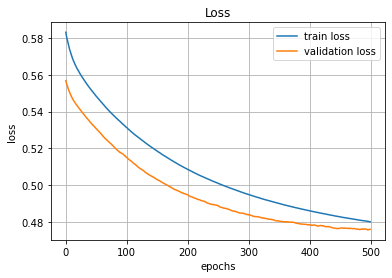

In [7]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

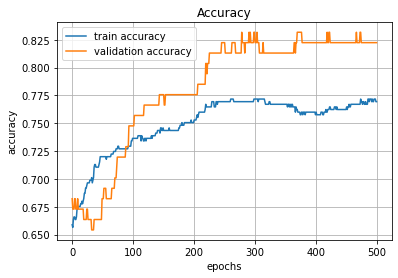

In [8]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()